# Pyramides d'images

Dans de nombreux problèmes de résolution d'image, nous ne savons pas quelle est la résolution appropriée pour l'image à utiliser. À partir d'études sur les systèmes visuels biologiques, il a été observé qu'ils fonctionnent selon une hiérarchie d'échelles. En tenant compte de cela, des algorithmes ont été créés pour le traitement d'images numériques basés sur des pyramides avec différentes échelles d'images.

Une telle pyramide peut, par exemple, être très utile pour accélérer la recherche d'un objet dans une image en trouvant d'abord une instance plus petite de cet objet à un niveau plus grossier de la pyramide, puis en recherchant l'objet en pleine résolution uniquement près du région où il a été détecté au niveau grossier, au niveau plus fin. (par exemple la détection de visages contenus dans une image).

Enfin, les pyramides d'images sont extrêmement utiles pour effectuer des opérations de traitement multi-échelles telles que le mélange d'images tout en préservant les détails.



**Pyramide d'image traditionnelle**

![](https://drive.google.com/uc?id=14dJoebazISQ7zrvRro2ImGg_5mhGaGTH)

Chaque calque a la moitié de la résolution (largeur et hauteur), et donc un quart des pixels, du calque parent.

*En raison du problème de pliage qui en résulte, il n'est pas utilisé dans la pratique.*

**Pyramide laplacienne de Burt et Adelson.**

La pyramide la plus connue et la plus utilisée est la pyramide laplacienne de Burt et Adelson.

([Burt, P. J. and Adelson, E. H. (1983a). La pyramide laplacienne en tant que code d'image compact. IEEE Transactions on Communications, COM-31(4):532–540. ](http://persci.mit.edu/pub_pdfs/pyramid83.pdf)).

Pour construire la pyramide, nous allons passer l'image d'origine à travers un filtre passe-bas, puis la sous-échantillonner avec r = 2 et la stocker au niveau suivant de la pyramide.

Une séquence d'images filtrées passe-bas G0, G1, ..., GN peut
obtenu en convoluant itérativement une fonction de petit poids avec un
image. Avec cette technique, la fréquence d'échantillonnage de l'image
diminue à chaque itération de sorte que la bande passante est réduite à
même pas d'une octave. Le sous-échantillonnage signifie également que le
le coût de calcul est réduit au minimum.

Parce que tous les niveaux de la pyramide sont liés à
taux d'échantillonnage r = 2, ce type de pyramide est connu sous le nom de *pyramide d'octave*.

Burt et Adelson ont d'abord proposé un noyau de la forme :

$$\left[ \begin{array}{ccc}c& b& a& b& c\end{array}\right]$$

avec $b=\frac{1}{4}$ et $c=\frac{1}{4}- \frac{a} {2}$.

![reduce.JPG](https://drive.google.com/uc?id=1-k3_NsuGI4Z_qxgpXg6pktcBXr4ndki5)


En pratique, un $a=\frac{3}{8}$ est utilisé, ce qui conduit au noyau binomial

$$\frac{1}{16}\left[\begin{array}{ccccc}1& 4& 6& 4& 1\end{array}\right]$$

qui est particulièrement facile à mettre en œuvre sur le plan informatique, en utilisant des décalages et des additions (c'était important à l'époque où les multiplicateurs étaient chers).

La raison pour laquelle ils appellent la pyramide résultante une * pyramide gaussienne * est que les convolutions répétées avec le noyau binomial convergent vers une gaussienne.

Dans l'image suivante, les cases jaune vif ( $L_1,L_2$ ) forment la pyramide gaussienne, qui est obtenue par filtrage passe-bas séquentiel et sous-échantillonnage ( $\downarrow 2$ ) de l'image d'entrée.

Les cases bleues sont l'image passe-bande (l'image passe-bande "Laplacienne") et sont calculées en soustrayant l'interpolation ($\uparrow2$) de l'image de la pyramide gaussienne de résolution inférieure de l'image d'origine.


![](https://drive.google.com/uc?id=1L_2Y9rYKfSbN8F-jYq-kidpO_DpzEgcw)

La case $Q$ indique la quantification ou un autre traitement pyramidal, par ex. suppression du bruit via le noyau.

![](https://drive.google.com/uc?id=1mIfKLbo1viTS7J6dKOhM2NiEaOS3QEcu)

Comme pour la pyramide gaussienne, le terme laplacien est un peu trompeur, car les images passe-bande sont en réalité des différences de gaussiennes (approximatives):
$$DoG(I;σ_1,σ_2)=G_{σ_1}*Ι -G_{σ_2}*Ι= (G_{σ_1}-G_{σ_2})*Ι$$

Un laplacien de la gaussienne est en fait la dérivée seconde :

$$LoG(Ι;σ)= \nabla^2(G_σ*Ι)=\nabla^2(G_σ)*Ι$$

où $\nabla$ est le laplacien (opérateur) d'une fonction.

Les laplaciens des gaussiens ont des propriétés mathématiques "élégantes" qui ont été largement étudiées et peuvent être utilisées pour une variété d'applications, y compris la détection des contours.



## Espace à l'échelle gaussienne (pyramide gaussienne)

Une séquence d'images filtrées passe-bas G0, G1, ..., GN peut
obtenu en convoluant itérativement une fonction de petit poids avec un
image. Avec cette technique, la fréquence d'échantillonnage de l'image
diminue à chaque itération de sorte que la bande passante est réduite à
pas uniformes d'une octave et ainsi minimiser la
coût du calcul.

La pyramide gaussienne de niveau $N$ d'une image $I$ est définie comme suit :

\begin{equation}
  \left\{\begin{array}{rcl}
    L^0 & = & I \\
    L^{n+1} & = & \text{REDUCE}(L^n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}


où l'opérateur $\text{REDUCE}(s)$ est la convolution de l'image $I$ avec le noyau symétrique $w=\{\frac{1}{16}, \frac{4}{16}, \frac {6}{16}, \frac{4}{16}, \frac{1}{16}\}$ (noyau 1D). Sa version 2D peut être étendue ou le 1D peut être appliqué aux lignes puis aux colonnes ou inversement.

L'espace à l'échelle de Gauss présente de nombreuses propriétés intéressantes :

1. *Homogénéité spatiale* : tous les emplacements de l'image sont filtrés avec le même gain.
2. *Isotropie spatiale* : toutes les structures sont traitées avec homogénéité quelle que soit leur orientation.
3. *Invariance d'échelle spatiale* : le gain de filtrage est indépendant de la taille des objets dans l'image.
4. *Linéarité* : le filtrage est effectué avec une convolution, qui est une opération linéaire.

La dernière étape de $\text {REDUCE}(\cdot) $ est le sous-échantillonnage de l'image filtrée.

Il s'agit d'une étape sans perte uniquement si la moitié des éléments haute fréquence $L^n$ ne sont pas disponibles dans $L^{n + 1}$.

Remarquez que, comme conséquence de la décimation, l'énergie totale de $L^{n+1}$ sera, en moyenne, 1/4 de l'énergie de $L^n$.


### Pyramide gaussienne

\# Importez le module [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html), le package [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html) est inclus dans la bibliothèque standard.

In [1]:
import urllib.request

Importation de [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html) depuis [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html). Installez avec "`sudo pip3 install opencv-python`" ([Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html)).

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Requêtes [lena image](https://en.wikipedia.org/wiki/Lenna). Cette fonction renvoie un objet de type fichier.

In [3]:
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')

[Διάβαζει](https://docs.python.org/3/tutorial/inputoutput.html) le "fichier" complet `HTTP_response` comme <a href="https://docs.python.org/3/library/functions.html#bytes">objet bytes</a>. Cet objet (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">immuable</a>) est transformé en (<a href="https://en.wikibooks. org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">mutable</a>) <a href="https://docs.python.org/3/library/functions.html#bytearray">objet bytearray</a>, comme requis par le convertisseur [Διάβαζει](https://docs.python.org/3/tutorial/inputoutput.html) (fonction) de NumPy. Le résultat final est un objet [Διάβαζει](https://docs.python.org/3/tutorial/inputoutput.html) contenant des entiers non signés de 8 bits.

In [4]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

In [5]:
BGR = cv2.imdecode(arr,-1)

Convertir l'image en YCrCb [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [6]:
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
#tmp = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
#Y = tmp

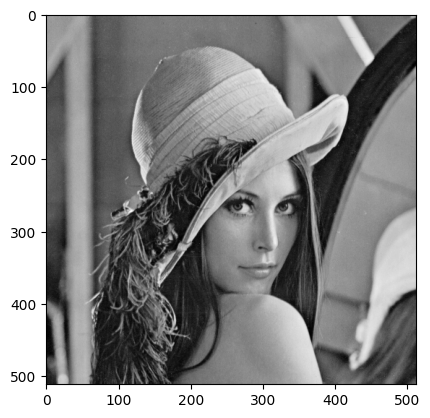

In [7]:
plt.imshow(Y, cmap="gray")

Nous calculons la pyramide et utilisons une <a href="https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range">liste</a> pour stocker les niveaux de la pyramide

In [8]:
N = 5 # Number of levels of the pyramid
L = [Y] # L^0 (the base of the pyramid)

Nous appliquons le filtre passe-bas <a href="http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff">pyrDown</a> d'OpenCV et sous-échantillonnons l'image. Plus de détails [εδώ](http://docs.opencv.org/master/dc/dff/tutorial_py_pyramids.html).

In [9]:
for n in range(N-1):
    print(n, len(L), len(L[n]))
    L.append(cv2.pyrDown(L[n]))

0 1 512
1 2 256
2 3 128
3 4 64


Text(0.5, 1.0, 'L[4]')

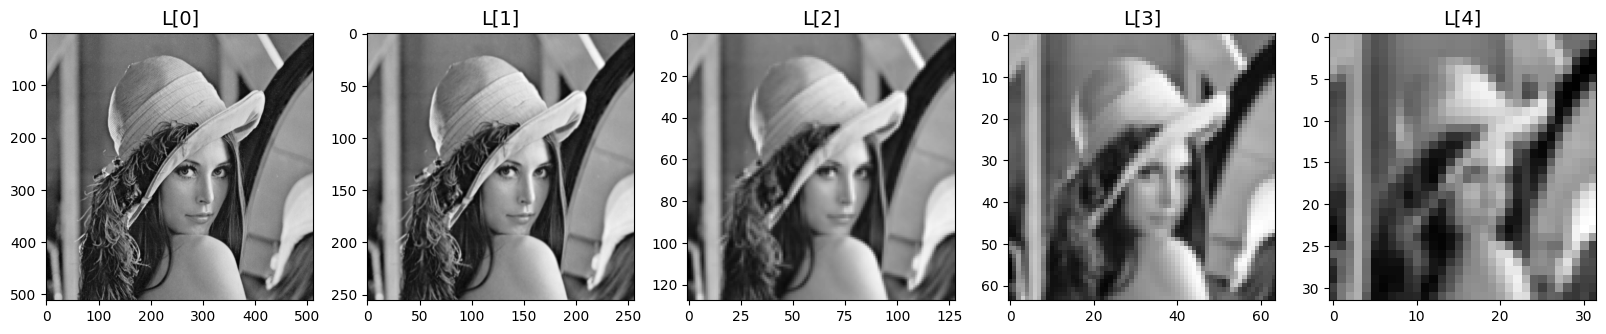

In [10]:
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(L[0], cmap="gray")
ax0.set_title('L[0]', fontsize=14)
ax1.imshow(L[1], cmap="gray")
ax1.set_title('L[1]', fontsize=14)
ax2.imshow(L[2], cmap="gray")
ax2.set_title('L[2]', fontsize=14)
ax3.imshow(L[3], cmap="gray")
ax3.set_title('L[3]', fontsize=14)
ax4.imshow(L[4], cmap="gray")
ax4.set_title('L[4]', fontsize=14)


## Pyramide laplacienne (transformation de la pyramide laplacienne) (LPT)

### Transformation vers l'avant

Dans une pyramide gaussienne, l'image $L^{N-1}$ (niveau supérieur) peut servir de prédiction pour l'image $L^{N − 2}$ (niveau inférieur suivant) et si cette prédiction (l'interpolation $ L^{N-1} $ ) est supprimé dans $ L^{N- 2} $ , le signal d'erreur résultant $ H^{N-2} $ peut avoir une entropie inférieure à celle du $ L^{N-2 } d'origine $.

Cette procédure peut être appliquée à la pyramide gaussienne complète, niveau par niveau, en obtenant une pyramide laplacienne via :

\begin{equation}
\left\{\begin{array}{rcl}
H^{N-1} & = & L^{N-1} \text{ /* le niveau supérieur de la pyramide gaussienne */}\\
H^n & = & L^n - \text{EXPAND}(L^{n+1});~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}


L'opérateur EXPAND effectue une interpolation bidimensionnelle de 1/2 sous-pixel

### LPT de Léna

In [11]:
H = [L[N-1]]
for n in range(N-1):
    interpolation = cv2.pyrUp(L[N-n-1])
    difference = L[N-n-2] - interpolation + 128
    H.append(difference)
H.reverse()

Dans les images de différence ou d'erreur de la pyramide laplacienne, la majorité des valeurs sont regroupées autour de 0 (au-dessus, elles sont affichées autour de 128 en raison de l'ajout d'un décalage correspondant).

Text(0.5, 1.0, 'H[4]')

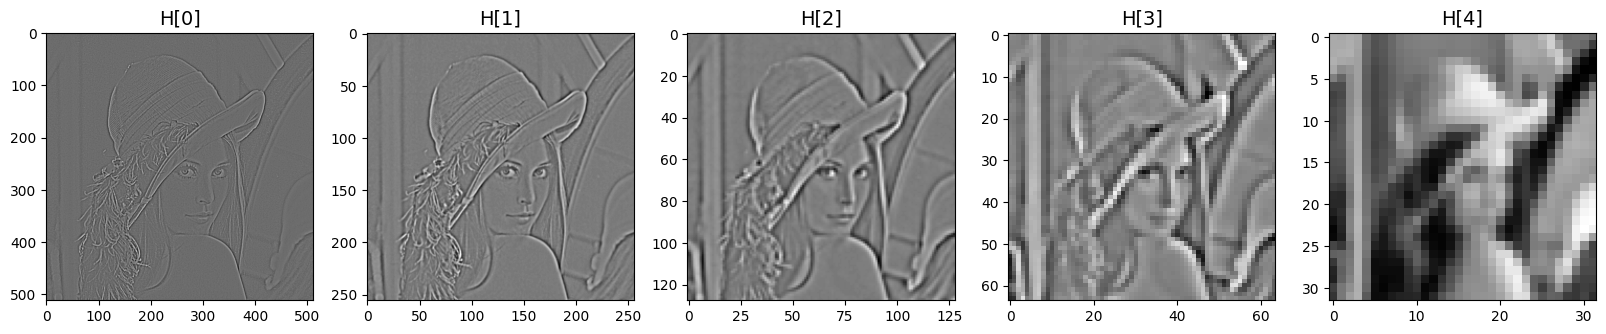

In [12]:
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(H[0], cmap="gray") # Base of the pyramid
ax0.set_title('H[0]', fontsize=14)
ax1.imshow(H[1], cmap="gray")
ax1.set_title('H[1]', fontsize=14)
ax2.imshow(H[2], cmap="gray")
ax2.set_title('H[2]', fontsize=14)
ax3.imshow(H[3], cmap="gray")
ax3.set_title('H[3]', fontsize=14)
ax4.imshow(H[4], cmap="gray")
ax4.set_title('H[4]', fontsize=14)

Calcul et traçage d'histogrammes pyramidaux ([`cv2.calcHist()`](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html))

0
1
2
3


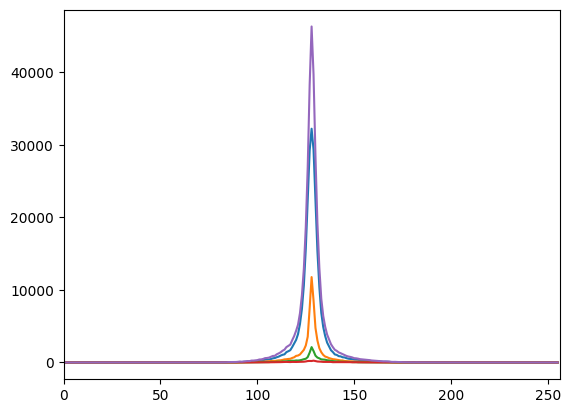

In [13]:
sum_hist = np.zeros([256,1], np.float64)
for n in range(N-1):
    print(n)
    hist = cv2.calcHist([H[n]], [0], None, [256], [0, 256])
    plt.plot (hist)
    sum_hist += hist
plt.plot(sum_hist)
plt.xlim([0,256])
plt.show()

Le nombre d'éléments de la pyramide est :

In [14]:
n_pels = 0
for n in range(N):
    n_pels += ((Y.shape[0]+1) >> n) * ((Y.shape[1]+1) >> n)

In [15]:
print("Number of elements in the original image =", Y.shape[0]*Y.shape[1])

Number of elements in the original image = 262144


In [16]:
print("Number or elements in (a component of) the pyramid =", n_pels, "(",100.*(n_pels/(1.*Y.shape[0]*Y.shape[1])-1),"% of increment)")

Number or elements in (a component of) the pyramid = 350209 ( 33.59413146972656 % of increment)


### Entropie d'image
##### *Qu'est-ce que l'entropie d'image ?*
Le nombre (théoriquement) minimal de bits par pixel (valeur de luminosité) nécessaire pour encoder une image.
##### *Comment l'entropie d'une image est-elle calculée ?*
Basé sur l'équation de Shannon :
$$Ε=-\sum_{k=1}^{K}P_Klog_2P_k$$
où $K$ est le nombre de valeurs de luminosité différentes présentes dans l'image et $P_k$ est la probabilité que la valeur de luminosité k apparaisse.
##### *Comment sont calculées les probabilités $P_k$ ?*
A partir de l'histogramme normalisé de l'image pour chaque $k = 0, ... K-1$, on calcule combien de fois ($n$) le niveau de luminosité $k$ apparaît dans l'image $I$ (de dimension MxN pixels ):
$P_k=H_I(k)=\frac{n}{ΜxN}$,
où $K$ les différents niveaux de luminosité.

Parce que l'entropie indique une compression optimale (sans perte), ce qui
peut être atteint, l'efficacité du codage d'une méthode souvent
par rapport à l'entropie.

L'efficacité du codage est calculée sur la base du nombre moyen de bits par pixel (BPP). La mesure habituelle de BPP pour les techniques sans perte (avec une longueur de mot variable) est donnée par la relation :
$$BPP=\sum_{k=0}^{K-1}N_kH_I(k)$$

où $K$ est le nombre de valeurs de luminance distinguées, $Ι_I(k)$ est la probabilité d'apparition de la valeur $k$ et $Ν_k$ les bits qui
sont utilisés pour coder la valeur de luminosité $k$.

L'entropie est donc simplement une mesure de la complexité - la quantité d'informations contenues dans l'image qui fournit des informations sur
stratégie d'encodage d'images.

On peut montrer que l'entropie a une valeur maximale lorsque

$$P_k=H_1(k)=\frac{1}{K}$$

qui représente un histogramme plat.

Dans ce cas et sachant que $K=2^B$

$$E(I)=-\sum_{k=0}^{K-1}\frac{1}{K}log_2(\frac{1}{K})=B$$

L'entropie de l'image I augmente lorsque l'histogramme de l'image "s'ouvre".
L'entropie de l'image I a une valeur minimale lorsqu'il existe une seule valeur de luminance (image uniforme ou constante)

Valide : $0 ≤ E(I) ≤ B$

Un théorème important de la théorie du codage limite la capacité
nous pouvons encoder une image sans perte en utilisant
longueur de mot variable : $$BPP ≥ E(I)$$

C'est la meilleure raison d'utiliser l'entropie comme mesure d'encodage.
Il nous dit par ex. que pour une image avec un histogramme parfaitement plat $E(I) = B$ ne peut pas être compressé en utilisant un code de longueur de mot variable.

La réduction de l'entropie de l'image peut être obtenue en transformant les valeurs de luminosité (changement de symboles) telles que par ex. en utilisant les différences entre
en pixels


In [17]:
# Install scipy with pip3 install scipy to use "scipy.stats.entropy".

import scipy.stats as st

In [18]:
entropy = st.entropy(sum_hist)[0]
print("Entropy of the pyramid =", entropy)

Entropy of the pyramid = 3.1872806072508206


Fournissez votre propre implémentation pour calculer l'entropie de l'image lena d'origine.

### Transformation inverse

Pouvons-nous récupérer l'image $I$ de $\{H^n ? n=N-1,\cdots,0\}$, la pyramide laplacienne, en utilisant la procédure :

\begin{equation}
  \left\{\begin{array}{rcl}
    I & = & H^{N-1} \\
    I & = & \text{EXPAND}(I) + H^n;~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

Notez que nous reconstruisons essentiellement la pyramide gaussienne entière.

### LPT inversé de Lena




In [19]:
R = H[N-1]
for n in range(N-1):
    R = cv2.pyrUp(R)
    R = R + H[N-n-2] - 128

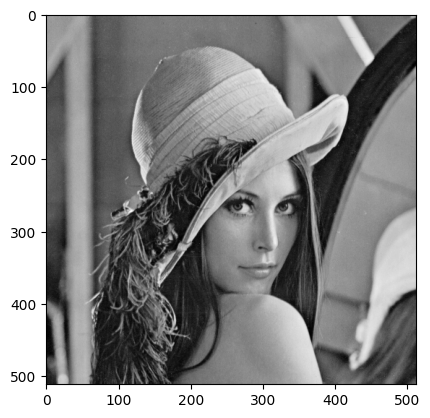

In [20]:
plt.imshow(R, cmap="gray")

In [21]:
# Check if the reconstruction is lossless
print((R == Y).all())

True


### Utilisations de la pyramide laplacienne
[Image Pyramids](http://www.cs.toronto.edu/~jepson/csc320/notes/pyramids.pdf)

